In [1]:
# Imports
import pandas as pd
import folium
import matplotlib.pyplot as plt


## Load data and run some basic checks

In [2]:
# Load data file
input_file = "/Users/callie/Desktop/1.USDR/cleaned_data/Compiled_Hospital_Data.csv"

df = pd.read_csv(input_file)
df.head(2)

,Hospital Name,ICU: Staffed Beds,ICU: Available Now,ICU: Available 24H,ICU: Available 72H,Med/Surg: Staffed Beds,Med/Surg: Available Now,Med/Surg: Available 24H,Med/Surg: Available 72H,Burn: Staffed Beds,...,Total PT RN,Total FT Social Service,Total PT Social Service,Total Onsite Feeding Tube Pumps,Total Onsite Hospital Beds,Total Onsite IV Pumps,Total Onsite Stationary Beds,Total Onsite Ventilators,source_file,date
0,Abington Memorial Hospital,107.0,41.0,NaN,NaN,383.0,56.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital Capacity and EEI July 19.xlsx,July 19
1,Albert Einstein at Elkins Park,27.0,17.0,17.0,17.0,39.0,29.0,29.0,29.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital Capacity and EEI July 19.xlsx,July 19


## Review column names

In [3]:
# Number of rows for each date import
df['date'].value_counts()

 July 22    68
 July 20    68
 July 18    68
 July 19    68
 July 21    68
Name: date, dtype: int64

In [4]:
for columns in df.columns:
    print(columns)

Hospital Name
ICU: Staffed Beds
ICU: Available Now
ICU: Available 24H
ICU: Available 72H
Med/Surg: Staffed Beds
Med/Surg: Available Now
Med/Surg: Available 24H
Med/Surg: Available 72H
Burn: Staffed Beds
Burn: Available Now
Burn: Available 24H
Burn: Available 72H
Peds ICU: Staffed Beds
Peds ICU: Available Now
Peds ICU: Available 24H
Peds ICU: Available 72H
Peds: Staffed Beds
Peds: Available Now
Peds: Available 24H
Peds: Available 72H
Neonatal: Staffed Beds
Neonatal: Available Now
Neonatal: Available 24H
Neonatal: Available 72H
Inpatient Rehab: Staffed Beds
Inpatient Rehab: Available Now
Inpatient Rehab: Available 24H
Inpatient Rehab: Available 72H
Pysch: Staffed Beds
Pysch: Available Now
Pysch: Available 24H
Pysch: Available 72H
Pysch-Adult: Staffed Beds
Pysch-Adult: Available Now
Pysch-Adult: Available 24H
Pysch-Adult: Available 72H
Pysch-Adol: Staffed Beds
Pysch-Adol: Available Now
Pysch-Adol: Available 24H
Pysch-Adol: Available 72H
Pysch-Geri: Staffed Beds
Pysch-Geri: Available Now
P

## When did each hospital last share data?
55 of the 68 hospitals reporting have the most recent data.
The missing hospitals are consistently not reporting ICU beds (this may be expected behavior)

In [5]:
only_beds_reports = df.dropna(subset = ["ICU: Staffed Beds"], inplace=False)
only_beds_reports.sort_values('date', ascending=False).groupby('Hospital Name').head(1)

,Hospital Name,ICU: Staffed Beds,ICU: Available Now,ICU: Available 24H,ICU: Available 72H,Med/Surg: Staffed Beds,Med/Surg: Available Now,Med/Surg: Available 24H,Med/Surg: Available 72H,Burn: Staffed Beds,...,Total PT RN,Total FT Social Service,Total PT Social Service,Total Onsite Feeding Tube Pumps,Total Onsite Hospital Beds,Total Onsite IV Pumps,Total Onsite Stationary Beds,Total Onsite Ventilators,source_file,date
206,Albert Einstein Medical Center,148.0,18.0,18.0,18.0,160.0,31.0,31.0,31.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital Capacity and EEI July 22.xlsx,July 22
226,Grand View Hospital,14.0,4.0,14.0,14.0,87.0,30.0,82.0,82.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Hospital Capacity and EEI July 22.xlsx,July 22
239,Lower Bucks Hospital,12.0,8.0,NaN,NaN,68.0,44.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,166.0,NaN,0.0,12.0,Hospital Capacity and EEI July 22.xlsx,July 22
238,Lansdale Hospital,30.0,4.0,NaN,NaN,126.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,Hospital Capacity and EEI July 22.xlsx,July 22
236,"Kindred Hospital, Philadelphia, Havertown",0.0,NaN,NaN,NaN,41.0,16.0,0.0,0.0,0.0,...,NaN,NaN,NaN,45.0,57.0,40.0,NaN,35.0,Hospital Capacity and EEI July 22.xlsx,July 22
235,Kensington Hospital,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,0.0,...,3.0,1.0,5.0,0.0,14.0,15.0,0.0,0.0,Hospital Capacity and EEI July 22.xlsx,July 22
234,"Jennersville Hospital, West Grove",9.0,3.0,NaN,NaN,43.0,16.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Hospital Capacity and EEI July 22.xlsx,July 22
233,Jefferson Bucks County Campus,18.0,11.0,11.0,8.0,64.0,44.0,14.0,38.0,0.0,...,39.0,3.0,4.0,15.0,83.0,100.0,NaN,NaN,Hospital Capacity and EEI July 22.xlsx,July 22
232,Jefferson - Torresdale Hospital,37.0,5.0,0.0,37.0,216.0,10.0,36.0,27.0,0.0,...,102.0,20.0,13.0,25.0,265.0,422.0,NaN,NaN,Hospital Capacity and EEI July 22.xlsx,July 22
231,Jefferson - Frankford Hospital,21.0,1.0,5.0,8.0,91.0,6.0,14.0,23.0,0.0,...,42.0,5.0,3.0,17.0,87.0,171.0,NaN,NaN,Hospital Capacity and EEI July 22.xlsx,July 22


In [6]:
# Get the most recent note on shortages:
shortage_note = df.dropna(subset = ["Shortage Note"], inplace=False)
list = shortage_note.sort_values('date', ascending=False).groupby('Hospital Name').head(1)
list[['Hospital Name', 'Shortage Note', 'date']]

,Hospital Name,Shortage Note,date
214,Children's Hospital of Philadelphia,We have started to use both Viral Transport Me...,July 22
252,Physicians Care Surgical Hospital,None,July 22
212,Chester County Hospital,"Based on current supplies and current use, exp...",July 22
216,Delaware County Memorial Hospital,Testing kits. Swabs.,July 22
219,Eagleville Hospital,No Tests at this time.,July 22
226,Grand View Hospital,WE NEED BOTH,July 22
213,Chestnut Hill Hospital,No shortages at this time.\n,July 22
246,Methodist Hospital,Both NP Specimen Collection Swabs and Viral Tr...,July 22
239,Lower Bucks Hospital,Will be needing additional supply of both swab...,July 22
256,Roxborough Memorial Hospital,Covid swabs,July 22


# Some quick graphs

## Trending ICA availability

In [7]:
# Aggregate across hospitals
ICU_now = pd.DataFrame(df['ICU: Available Now'].groupby(df['date']).agg('sum'))
ICU_24H = pd.DataFrame(df['ICU: Available 24H'].groupby(df['date']).agg('sum'))
ICU_72H = pd.DataFrame(df['ICU: Available 72H'].groupby(df['date']).agg('sum'))
ICU_Staffed = pd.DataFrame(df['ICU: Staffed Beds'].groupby(df['date']).agg('sum'))
date = ["7/18", "7/19", "7/20", "7/21", '7/22']


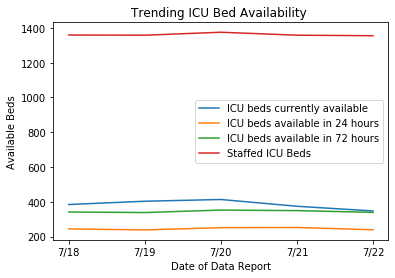

In [8]:
plt.plot(date, ICU_now['ICU: Available Now'], label = "ICU beds currently available")
plt.plot(date, ICU_24H['ICU: Available 24H'], label = "ICU beds available in 24 hours")
plt.plot(date, ICU_72H['ICU: Available 72H'], label = "ICU beds available in 72 hours")
plt.plot(date, ICU_Staffed['ICU: Staffed Beds'], label = "Staffed ICU Beds")

plt.xlabel('Date of Data Report')
plt.ylabel('Available Beds')
plt.title("Trending ICU Bed Availability ")
plt.legend()

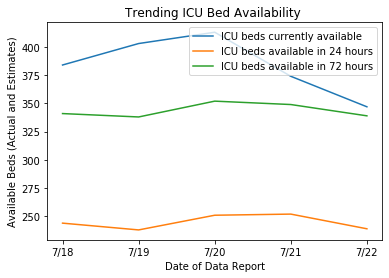

In [9]:
plt.plot(date, ICU_now['ICU: Available Now'], label = "ICU beds currently available")
plt.plot(date, ICU_24H['ICU: Available 24H'], label = "ICU beds available in 24 hours")
plt.plot(date, ICU_72H['ICU: Available 72H'], label = "ICU beds available in 72 hours")
plt.xlabel('Date of Data Report')
plt.ylabel('Available Beds (Actual and Estimates)')
plt.title("Trending ICU Bed Availability ")
plt.legend()

## Flag Hospitals with less than 10% ICU capacity (new field example) 

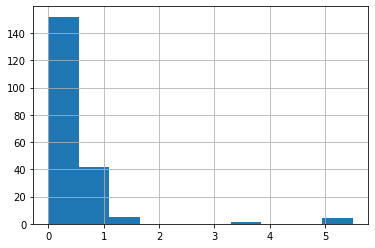

In [10]:
df["ICU_current_capacity"]  = round(df['ICU: Available Now']/df['ICU: Staffed Beds'], 2)
df["ICU_current_capacity"].hist()

In [11]:
low_capacity = df[df["ICU_current_capacity"] <= .15]
low_capacity.sort_values("ICU_current_capacity")

,Hospital Name,ICU: Staffed Beds,ICU: Available Now,ICU: Available 24H,ICU: Available 72H,Med/Surg: Staffed Beds,Med/Surg: Available Now,Med/Surg: Available 24H,Med/Surg: Available 72H,Burn: Staffed Beds,...,Total FT Social Service,Total PT Social Service,Total Onsite Feeding Tube Pumps,Total Onsite Hospital Beds,Total Onsite IV Pumps,Total Onsite Stationary Beds,Total Onsite Ventilators,source_file,date,ICU_current_capacity
220,Einstein Medical Center Hospital,16.0,0.0,6.0,6.0,128.0,13.0,15.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital Capacity and EEI July 22.xlsx,July 22,0.00
12,Delaware County Memorial Hospital,10.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,...,3.0,0.0,15.0,200.0,100.0,0.0,9.0,Hospital Capacity and EEI July 19.xlsx,July 19,0.00
162,Jeanes Hospital,20.0,0.0,0.0,0.0,126.0,13.0,13.0,13.0,0.0,...,NaN,NaN,28.0,146.0,340.0,0.0,14.0,Hospital Capacity and EEI July 21.xlsx,July 21,0.00
27,Jefferson - Frankford Hospital,21.0,0.0,5.0,8.0,91.0,16.0,14.0,23.0,0.0,...,5.0,3.0,17.0,87.0,171.0,NaN,NaN,Hospital Capacity and EEI July 19.xlsx,July 19,0.00
163,Jefferson - Frankford Hospital,21.0,0.0,5.0,8.0,91.0,6.0,14.0,23.0,0.0,...,5.0,3.0,17.0,87.0,171.0,NaN,NaN,Hospital Capacity and EEI July 21.xlsx,July 21,0.00
299,Jefferson - Frankford Hospital,21.0,0.0,5.0,8.0,91.0,19.0,14.0,23.0,0.0,...,5.0,3.0,17.0,87.0,171.0,NaN,NaN,Hospital Capacity and EEI July 18.xlsx,July 18,0.00
176,Mercy Fitzgerald Hospital,17.0,0.0,NaN,NaN,112.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital Capacity and EEI July 21.xlsx,July 21,0.00
94,Jeanes Hospital,20.0,0.0,0.0,0.0,126.0,13.0,13.0,13.0,0.0,...,NaN,NaN,28.0,146.0,340.0,0.0,14.0,Hospital Capacity and EEI July 20.xlsx,July 20,0.00
284,Delaware County Memorial Hospital,11.0,0.0,0.0,0.0,44.0,2.0,2.0,2.0,0.0,...,3.0,0.0,15.0,200.0,100.0,0.0,9.0,Hospital Capacity and EEI July 18.xlsx,July 18,0.00
131,Thomas Jefferson University Hospital,113.0,3.0,6.0,10.0,529.0,95.0,103.0,109.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital Capacity and EEI July 20.xlsx,July 20,0.03


In [12]:
# Aggregate low capacity
low_today = low_capacity[low_capacity['date'] == " July 22"]
low_today[["Hospital Name", "ICU: Staffed Beds", "ICU: Available Now", "ICU: Available 24H", "ICU_current_capacity" ]]

,Hospital Name,ICU: Staffed Beds,ICU: Available Now,ICU: Available 24H,ICU_current_capacity
206,Albert Einstein Medical Center,148.0,18.0,18.0,0.12
215,Crozer-Chester Medical Center,28.0,2.0,0.0,0.07
218,Doylestown Hospital,14.0,1.0,NaN,0.07
220,Einstein Medical Center Hospital,16.0,0.0,6.0,0.00
229,Hospital of the University of Pennsylvania,122.0,18.0,NaN,0.15
231,Jefferson - Frankford Hospital,21.0,1.0,5.0,0.05
232,Jefferson - Torresdale Hospital,37.0,5.0,0.0,0.14
238,Lansdale Hospital,30.0,4.0,NaN,0.13
243,Main Line-Paoli Memorial Hospital,16.0,1.0,NaN,0.06
254,Presbyterian Med Center-Univ of Pa Hlth Sys,68.0,2.0,NaN,0.03


## Map examples (likely not impactful)

In [13]:
# Center Map on Abinton Hospital
center_point = [40.119262, -75.119874]
county_map = folium.Map(location=center_point, zoom_start=11, tiles="CartoDB dark_matter")
marker_list = [[40.119262, -75.119874],[40.072446, -75.104917]]

for mark in marker_list:
    hospital = [mark[0], mark[1]]
    marker = folium.CircleMarker(location=hospital)
    marker.add_to(county_map)


In [14]:
# Display Map
display(county_map)

In [15]:
county_map.save("my_map.html")